In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')

### Data Load

In [43]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

### Head Of the Data

In [44]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Information of dataset columns

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### Shape of the dataset

In [46]:
df.shape

(23486, 11)

In [47]:
df = df.drop(columns="Unnamed: 0")

### Concate the review and title column of the dataset

In [48]:
concat_reviews = []

for title, review in zip(df["Title"], df["Review Text"]):
    if not pd.isnull(title) and pd.isnull(review):
        concat_review = title
    elif pd.isnull(title) and not pd.isnull(review):
        concat_review = review
    elif not pd.isnull(title) and not pd.isnull(review):
        concat_review = title + " " + review
    concat_reviews.append(concat_review)
    
df = df.drop(columns=["Title", "Review Text"])
df["concat reviews"] = concat_reviews

In [49]:
df.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,concat reviews
0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


### Checking the unique value of the column "Clothing ID"

In [50]:
print("Value Counts:\n", df["Clothing ID"].value_counts())
print("--------------")
print("Unique Values:\n", df["Clothing ID"].nunique())

df = df.drop(columns=["Clothing ID"])

Value Counts:
 1078    1024
862      806
1094     756
1081     582
872      545
        ... 
776        1
668        1
633        1
734        1
522        1
Name: Clothing ID, Length: 1206, dtype: int64
--------------
Unique Values:
 1206


### Percentage of missing value in each columns

In [51]:
print("Percentage of missing values:")
print("-----------------------------")
print(df.isnull().mean().round(4).mul(100).sort_values(ascending=False))

Percentage of missing values:
-----------------------------
Division Name              0.06
Department Name            0.06
Class Name                 0.06
Age                        0.00
Rating                     0.00
Recommended IND            0.00
Positive Feedback Count    0.00
concat reviews             0.00
dtype: float64


### Dropping the missing rows

In [52]:
df = df.dropna(axis=0)

### Dropping the duplicate rows

In [53]:
df.duplicated().sum()

2

In [54]:
df = df.drop_duplicates()

### Visualization of distribution of age and feedback column

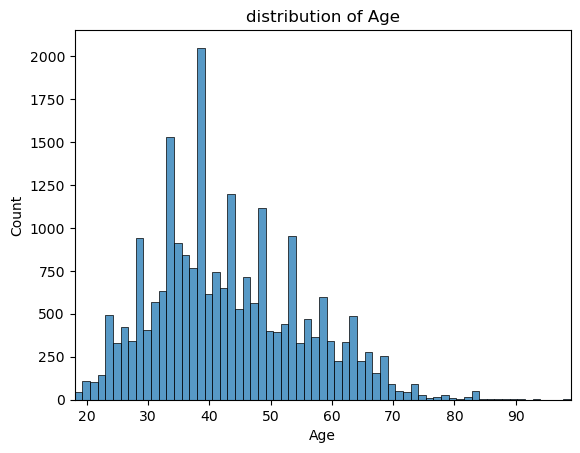

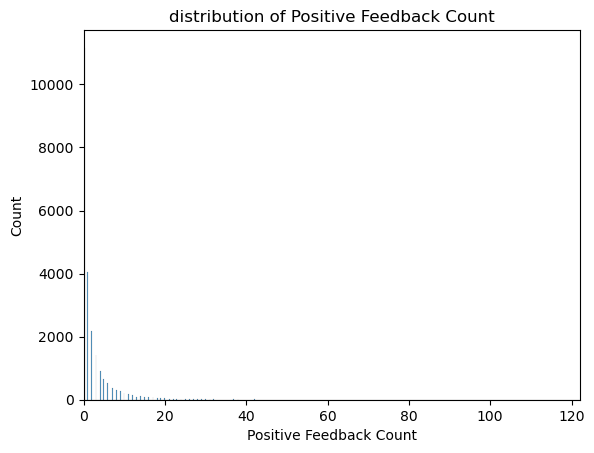

In [55]:
columns = ["Age", "Positive Feedback Count"]

for column in columns:
    sns.histplot(x=df[column])
    plt.title(f"distribution of {column}")
    plt.xlim(df[column].min(), df[column].max())
    plt.show()

#### Skew the columns

In [56]:
from scipy.stats import skew

columns = ["Age", "Rating", "Positive Feedback Count"]

for column in columns:
    skewness = skew(df[column])
    print(f"{column}: {skewness}")

Age: 0.5254714457914279
Rating: -1.312480250916517
Positive Feedback Count: 6.4708741835762


### Visulize the updated column of age and feedback

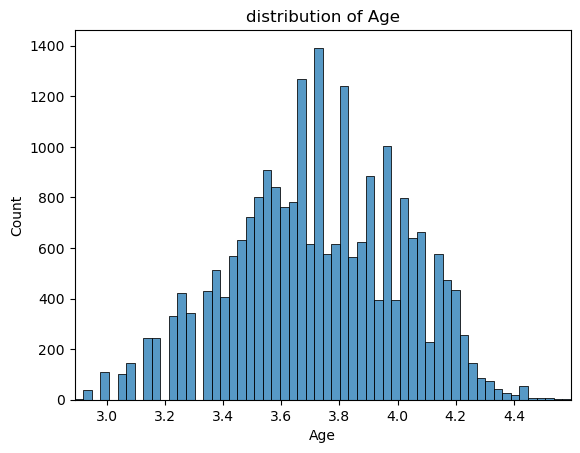

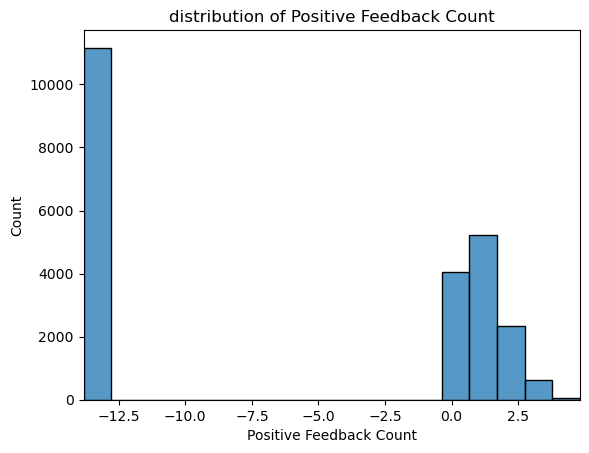

In [57]:
df["Positive Feedback Count"] = df["Positive Feedback Count"] + .000001

columns = ["Age", "Positive Feedback Count"]

for column in columns:
    df[column] = np.log(df[column])
    
for column in columns:
    sns.histplot(x=df[column])
    plt.title(f"distribution of {column}")
    plt.xlim(df[column].min(), df[column].max())
    plt.show()

### Check the unique value in three columns 'Division Name', 'Department name' and 'Class Name'

In [58]:
columns = ["Division Name", "Department Name", "Class Name"]

for column in columns:
    print(f"unique values in: {column}: {df[column].value_counts()}")

unique values in: Division Name: General           13849
General Petite     8120
Initmates          1501
Name: Division Name, dtype: int64
unique values in: Department Name: Tops        10468
Dresses      6319
Bottoms      3798
Intimate     1734
Jackets      1032
Trend         119
Name: Department Name, dtype: int64
unique values in: Class Name: Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1146
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               349
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64


### Label Encoding of Department name and division name

In [59]:
ohe_department_name = pd.get_dummies(df["Department Name"])
ohe_division_name = pd.get_dummies(df["Division Name"])

df = df.join(ohe_department_name).join(ohe_division_name)
df = df.drop(columns=["Department Name", "Division Name"])

### Binary Encoding applies to Class Name categorical variable

In [60]:
df = BinaryEncoder(cols = ["Class Name"], drop_invariant = True).fit_transform(df)

In [61]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

columns = ["Age", "Positive Feedback Count"]

for column in columns:
    reshaped_column = np.array(df[column]).reshape(-1, 1)
    df[column] = scaler.fit_transform(reshaped_column)

In [62]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Class Name_0,Class Name_1,Class Name_2,Class Name_3,Class Name_4,concat reviews,Bottoms,Dresses,Intimate,Jackets,Tops,Trend,General,General Petite,Initmates
0,-0.798513,4,1,-1.045380,0,0,0,0,1,Absolutely wonderful - silky and sexy and comf...,0,0,1,0,0,0,0,0,1
1,-0.694367,5,1,0.995361,0,0,0,1,0,Love this dress! it's sooo pretty. i happene...,0,1,0,0,0,0,1,0,0
2,1.287114,3,0,-1.045380,0,0,0,1,0,Some major design flaws I had such high hopes ...,0,1,0,0,0,0,1,0,0
3,0.651063,5,1,-1.045380,0,0,0,1,1,"My favorite buy! I love, love, love this jumps...",1,0,0,0,0,0,0,1,0
4,0.435203,5,1,1.049792,0,0,1,0,0,Flattering shirt This shirt is very flattering...,0,0,0,0,1,0,1,0,0


## Preprocessing of Text

#### Removing HTML tags

In [63]:
from bs4 import BeautifulSoup


def remove_html(text):
    """Removes html tags from reviews."""
    soup = BeautifulSoup(text, "lxml")
    stripped_text = soup.get_text()
    return stripped_text

#### Removing Punctuation

In [64]:
import string


def remove_punctuation(text):
    """Removes punctuation from reviews."""
    no_punct_text = "".join([char for char in text if char not in string.punctuation])
    return no_punct_text

#### tokenizing data

In [65]:
import nltk
from nltk.tokenize import RegexpTokenizer


# creates an array of tokens from each word in the review
tokenizer = RegexpTokenizer(r"\w+")

#### Removing stopwords

In [66]:
nltk.download('stopwords')
from nltk.corpus import stopwords


def remove_stopwords(text):
    """Removes stopwords from an array of tokens."""
    words = [word for word in text if word not in stopwords.words("english")]
    return words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Applying lemmatization, using spacy 

In [67]:
import spacy


lemmatizer = spacy.load('en_core_web_sm', disable = ['parser','ner'])

def lemmatize_text(text):
    """Lemmatizes, or gets the stems of an array of tokens."""
    text = " ".join(text)
    text = lemmatizer(text)
    lemmatized_text = (" ".join([token.lemma_ for token in text]))
    return lemmatized_text

### Applying preprocessing function to review column

In [68]:
def preprocess_text(text):
    """Returns preprocessed text for NLP."""
    text = text.apply(lambda review: remove_html(review))
    text = text.apply(lambda review: remove_punctuation(review))
    text = text.apply(lambda review: tokenizer.tokenize(review.lower()))
    text = text.apply(lambda review: remove_stopwords(review))
    text = text.apply(lambda review: lemmatize_text(review))
    return text

df["preprocessed_reviews"] = preprocess_text(df["concat reviews"])

In [69]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Class Name_0,Class Name_1,Class Name_2,Class Name_3,Class Name_4,concat reviews,Bottoms,Dresses,Intimate,Jackets,Tops,Trend,General,General Petite,Initmates,preprocessed_reviews
0,-0.798513,4,1,-1.045380,0,0,0,0,1,Absolutely wonderful - silky and sexy and comf...,0,0,1,0,0,0,0,0,1,absolutely wonderful silky sexy comfortable
1,-0.694367,5,1,0.995361,0,0,0,1,0,Love this dress! it's sooo pretty. i happene...,0,1,0,0,0,0,1,0,0,love dress sooo pretty happen find store I m g...
2,1.287114,3,0,-1.045380,0,0,0,1,0,Some major design flaws I had such high hopes ...,0,1,0,0,0,0,1,0,0,major design flaw high hope dress really want ...
3,0.651063,5,1,-1.045380,0,0,0,1,1,"My favorite buy! I love, love, love this jumps...",1,0,0,0,0,0,0,1,0,favorite buy love love love jumpsuit fun flirt...
4,0.435203,5,1,1.049792,0,0,1,0,0,Flattering shirt This shirt is very flattering...,0,0,0,0,1,0,1,0,0,flatter shirt shirt flatter due adjustable fro...


### Dropping concat review column making new columns

In [70]:
df = df.drop(columns=["concat reviews"])

#### Use text blob library to calculate polarity of sentiment

In [71]:
from textblob import TextBlob 
from textblob.en import subjectivity
def get_sentiment(review):
    """Returns a sentiment category and a strength of sentiment from -1 to 1."""
    sentiment_analysis = TextBlob(review)
    sentiment_polarity = sentiment_analysis.sentiment.polarity, 
    sentiment_subjectivity = sentiment_analysis.sentiment.subjectivity
    return sentiment_polarity, sentiment_subjectivity

df["polarity"] = df["preprocessed_reviews"].apply(lambda x: get_sentiment(x)[0][0])

### Visualization of distribution of polarity

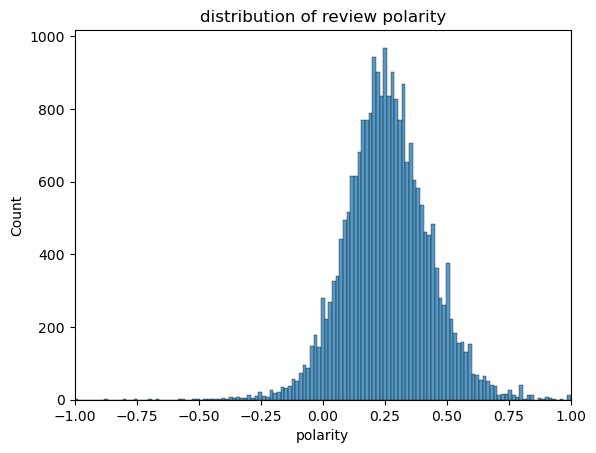

In [72]:
sns.histplot(df["polarity"])
plt.title(f"distribution of review polarity")
plt.xlim(df["polarity"].min(), df["polarity"].max())
plt.show()

#### Calculating sentiment of Reviews Using Text blob

In [73]:


sentiment_scores_tb = [round(TextBlob(str(new)).sentiment.polarity, 3) for new in df.preprocessed_reviews]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]
print (type(sentiment_category_tb))
senti=pd.DataFrame(sentiment_category_tb)
print (type(senti))
df['sentiment']=senti
df.dropna(inplace=True)


<class 'list'>
<class 'pandas.core.frame.DataFrame'>


### Label encoding the new categorcal column "Sentiment"

In [74]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the column data
le.fit(df['sentiment'])

# Transform the column using the fitted encoder
encoded_column = le.transform(df['sentiment'])

In [75]:
df['sentiment encode']=encoded_column

In [76]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Class Name_0,Class Name_1,Class Name_2,Class Name_3,Class Name_4,Bottoms,...,Jackets,Tops,Trend,General,General Petite,Initmates,preprocessed_reviews,polarity,sentiment,sentiment encode
0,-0.798513,4,1,-1.045380,0,0,0,0,1,0,...,0,0,0,0,0,1,absolutely wonderful silky sexy comfortable,0.633333,positive,2
1,-0.694367,5,1,0.995361,0,0,0,1,0,0,...,0,0,0,1,0,0,love dress sooo pretty happen find store I m g...,0.318750,positive,2
2,1.287114,3,0,-1.045380,0,0,0,1,0,0,...,0,0,0,1,0,0,major design flaw high hope dress really want ...,0.081439,positive,2
3,0.651063,5,1,-1.045380,0,0,0,1,1,1,...,0,0,0,0,1,0,favorite buy love love love jumpsuit fun flirt...,0.500000,positive,2
4,0.435203,5,1,1.049792,0,0,1,0,0,0,...,0,1,0,1,0,0,flatter shirt shirt flatter due adjustable fro...,0.458333,positive,2


### Machine Learning

In [77]:
X, y = df.drop(columns=["Rating","sentiment encode","sentiment","preprocessed_reviews"]), df["sentiment encode"]

In [78]:
y.shape

(23454,)

### Spliting the data into train and test split

In [79]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
y_train.shape

(15714,)

### Modeling the five classifier of Machine Learning 

Accuracy of Decision Tree Classifier:  0.9109819121447028
Accuracy of K Nearest Neighbors Classifier:  0.9401808785529716
Accuracy of Naive Bayes Classifier:  0.18152454780361757
Accuracy of Logistic Regression Classifier:  0.9421188630490956
Accuracy of Random Forest Classifier:  0.9404392764857881


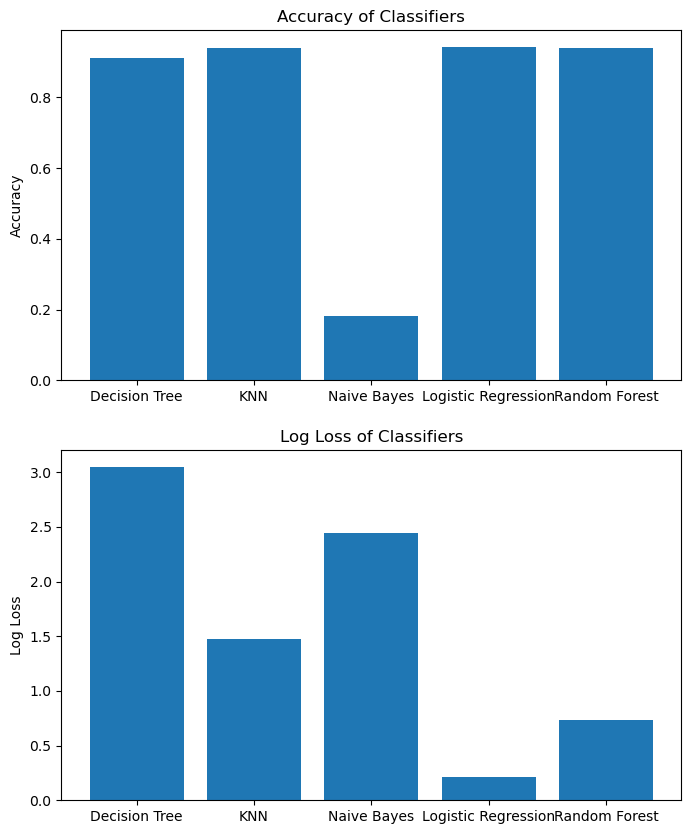

In [81]:
# Import required libraries


# Initialize the classifiers
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = GaussianNB()
clf4 = LogisticRegression()
clf5 = RandomForestClassifier()

# Train the classifiers
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)

# Calculate accuracy and loss of each classifier
acc_scores = [accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2),
              accuracy_score(y_test, y_pred3), accuracy_score(y_test, y_pred4),
              accuracy_score(y_test, y_pred5)]

loss_scores = [log_loss(y_test, clf1.predict_proba(X_test)), log_loss(y_test, clf2.predict_proba(X_test)),
               log_loss(y_test, clf3.predict_proba(X_test)), log_loss(y_test, clf4.predict_proba(X_test)),
               log_loss(y_test, clf5.predict_proba(X_test))]

print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, y_pred1))
print("Accuracy of K Nearest Neighbors Classifier: ", accuracy_score(y_test, y_pred2))
print("Accuracy of Naive Bayes Classifier: ", accuracy_score(y_test, y_pred3))
print("Accuracy of Logistic Regression Classifier: ", accuracy_score(y_test, y_pred4))
print("Accuracy of Random Forest Classifier: ", accuracy_score(y_test, y_pred5))
# Create a plot
fig, axs = plt.subplots(2, figsize=(8, 10))

axs[0].bar(range(len(acc_scores)), acc_scores)
axs[0].set_xticks(range(len(acc_scores)))
axs[0].set_xticklabels(['Decision Tree', 'KNN', 'Naive Bayes', 'Logistic Regression', 'Random Forest'])
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy of Classifiers')

axs[1].bar(range(len(loss_scores)), loss_scores)
axs[1].set_xticks(range(len(loss_scores)))
axs[1].set_xticklabels(['Decision Tree', 'KNN', 'Naive Bayes', 'Logistic Regression', 'Random Forest'])
axs[1].set_ylabel('Log Loss')
axs[1].set_title('Log Loss of Classifiers')

plt.show()


In [94]:
y_train.shape

(15714,)

Epoch 1/20
393/393 [==============================] - 9s 15ms/step - loss: 0.3696 - accuracy: 0.0179 - val_loss: 0.4541 - val_accuracy: 0.1094
Epoch 2/20
393/393 [==============================] - 6s 14ms/step - loss: 0.2289 - accuracy: 0.0193 - val_loss: 0.1953 - val_accuracy: 0.0000e+00
Epoch 3/20
393/393 [==============================] - 6s 14ms/step - loss: 0.2133 - accuracy: 0.0159 - val_loss: 0.2141 - val_accuracy: 3.1817e-04
Epoch 4/20
393/393 [==============================] - 6s 16ms/step - loss: 0.2094 - accuracy: 0.0162 - val_loss: 0.1936 - val_accuracy: 0.0350
Epoch 5/20
393/393 [==============================] - 6s 14ms/step - loss: 0.2059 - accuracy: 0.0195 - val_loss: 0.1922 - val_accuracy: 3.1817e-04
Epoch 6/20
393/393 [==============================] - 6s 14ms/step - loss: 0.2023 - accuracy: 0.0167 - val_loss: 0.1993 - val_accuracy: 0.0019
Epoch 7/20
393/393 [==============================] - 6s 14ms/step - loss: 0.1998 - accuracy: 0.0180 - val_loss: 0.1861 - val_accu

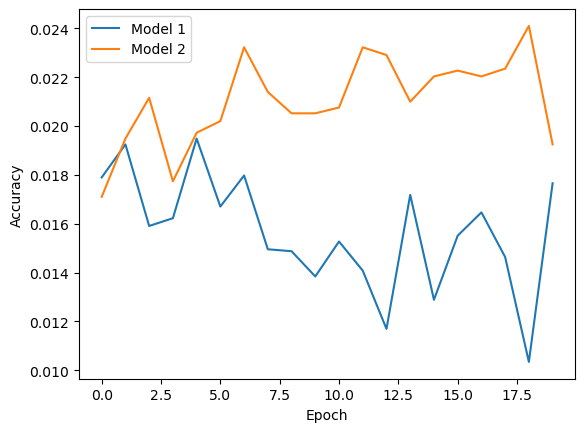

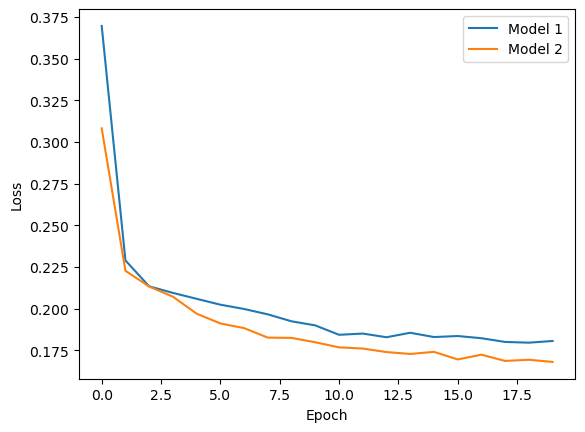

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# define the input shape
input_shape = (18,)

# define the output shape
output_shape = (3, 2, 2, 2, 2)

# create the first model
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=input_shape))
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(output_shape[0] * output_shape[1] * output_shape[2] * output_shape[3] * output_shape[4], activation='relu', name='output'))

# create the second model
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=input_shape))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(2048, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(output_shape[0] * output_shape[1] * output_shape[2] * output_shape[3] * output_shape[4], activation='relu', name='output'))

# compile the models
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# train the models
history1 = model1.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)
history2 = model2.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

# compare the results
import matplotlib.pyplot as plt

# plot the accuracy of the two models
plt.plot(history1.history['accuracy'], label='Model 1')
plt.plot(history2.history['accuracy'], label='Model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot the loss of the two models
plt.plot(history1.history['loss'], label='Model 1')
plt.plot(history2.history['loss'], label='Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
393/393 [==============================] - 8s 15ms/step - loss: 0.3678 - accuracy: 0.0207 - val_loss: 0.4157 - val_accuracy: 9.5450e-04
Epoch 2/50
393/393 [==============================] - 6s 14ms/step - loss: 0.2283 - accuracy: 0.0194 - val_loss: 0.1947 - val_accuracy: 0.0045
Epoch 3/50
393/393 [==============================] - 6s 14ms/step - loss: 0.2137 - accuracy: 0.0186 - val_loss: 0.1925 - val_accuracy: 0.0048
Epoch 4/50
393/393 [==============================] - 6s 14ms/step - loss: 0.2067 - accuracy: 0.0208 - val_loss: 0.1913 - val_accuracy: 0.0000e+00
Epoch 5/50
393/393 [==============================] - 6s 14ms/step - loss: 0.2073 - accuracy: 0.0212 - val_loss: 0.1950 - val_accuracy: 0.0000e+00
Epoch 6/50
393/393 [==============================] - 6s 14ms/step - loss: 0.2021 - accuracy: 0.0185 - val_loss: 0.1893 - val_accuracy: 0.0000e+00
Epoch 7/50
393/393 [==============================] - 6s 14ms/step - loss: 0.1993 - accuracy: 0.0184 - val_loss: 0.1918 - val_

197/197 [==============================] - 10s 50ms/step - loss: 0.1946 - accuracy: 0.0194 - val_loss: 0.1999 - val_accuracy: 0.0280
Epoch 8/50
197/197 [==============================] - 10s 48ms/step - loss: 0.1904 - accuracy: 0.0187 - val_loss: 0.1864 - val_accuracy: 0.0016
Epoch 9/50
197/197 [==============================] - 10s 50ms/step - loss: 0.1870 - accuracy: 0.0209 - val_loss: 0.1829 - val_accuracy: 9.5450e-04
Epoch 10/50
197/197 [==============================] - 9s 45ms/step - loss: 0.1845 - accuracy: 0.0215 - val_loss: 0.1749 - val_accuracy: 0.0121
Epoch 11/50
197/197 [==============================] - 9s 48ms/step - loss: 0.1805 - accuracy: 0.0235 - val_loss: 0.1832 - val_accuracy: 0.0019
Epoch 12/50
197/197 [==============================] - 9s 44ms/step - loss: 0.1770 - accuracy: 0.0199 - val_loss: 0.1719 - val_accuracy: 0.0054
Epoch 13/50
197/197 [==============================] - 8s 43ms/step - loss: 0.1762 - accuracy: 0.0229 - val_loss: 0.1716 - val_accuracy: 0.0404

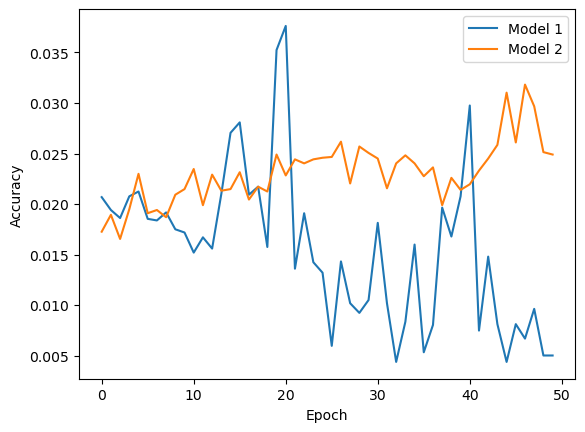

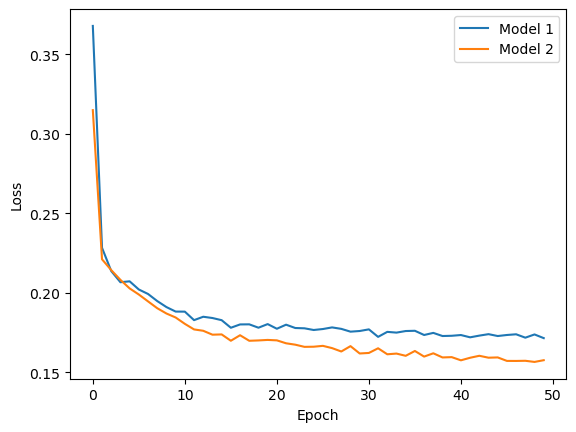

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# define the input shape
input_shape = (18,)

# define the output shape
output_shape = (3, 2, 2, 2, 2)

# create the first model
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=input_shape))
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(output_shape[0] * output_shape[1] * output_shape[2] * output_shape[3] * output_shape[4], activation='relu', name='output'))

# create the second model
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=input_shape))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(2048, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(output_shape[0] * output_shape[1] * output_shape[2] * output_shape[3] * output_shape[4], activation='relu', name='output'))

# compile the models
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# train the models
history1 = model1.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)
history2 = model2.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

# compare the results
import matplotlib.pyplot as plt

# plot the accuracy of the two models
plt.plot(history1.history['accuracy'], label='Model 1')
plt.plot(history2.history['accuracy'], label='Model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot the loss of the two models
plt.plot(history1.history['loss'], label='Model 1')
plt.plot(history2.history['loss'], label='Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
